In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def O(N, q):
    """
    The einstein solid counting for multiplicities
    """
    f = np.math.factorial(q+N-1)/np.math.factorial(q)/np.math.factorial(N-1)
    return f

In [3]:
Na = 1 # einstein solid A with 12 atoms
Nb = 100 # einstein solid B with 8 atoms
qtot = 500 # total number of energy chunks

In [4]:
qs = []
omega_ABs = []

end = qtot-480
print("qA qB O_A          O_B           O_AB")
for q in range(end+1):
    qA = q
    qs.append(qA)
    qB = qtot-q
    omega_A = O(Na, qA)
    omega_B = O(Nb, qB)
    omega_AB = omega_A * omega_B
    omega_ABs.append(omega_AB)
    print("{} {} {} {} {}".format(qA, qB, omega_A, omega_B, omega_AB))
    
# total number of microstates
# omega_tot = np.sum(np.array([O(Na, q)*O(Nb, qtot-q) for q in range(end+1)]))
# print(omega_tot)

qA qB O_A          O_B           O_AB
0 500 1.0 1.852352031776976e+115 1.852352031776976e+115
1 499 1.0 1.5462036993130013e+115 1.5462036993130013e+115
2 498 1.0 1.2902268327043273e+115 1.2902268327043273e+115
3 497 1.0 1.0762696192407955e+115 1.0762696192407955e+115
4 496 1.0 8.974932898702608e+114 8.974932898702608e+114
5 495 1.0 7.481624735725199e+114 7.481624735725199e+114
6 494 1.0 6.234687279771e+114 6.234687279771e+114
7 493 1.0 5.193820432052064e+114 5.193820432052064e+114
8 492 1.0 4.325259244935249e+114 4.325259244935249e+114
9 491 1.0 3.6007234323318824e+114 3.6007234323318824e+114
10 490 1.0 2.996534246228736e+114 2.996534246228736e+114
11 489 1.0 2.4928722931274714e+114 2.4928722931274714e+114
12 488 1.0 2.0731539988764174e+114 2.0731539988764174e+114
13 487 1.0 1.7235079241085037e+114 1.7235079241085037e+114
14 486 1.0 1.4323350836874426e+114 1.4323350836874426e+114
15 485 1.0 1.1899399156787985e+114 1.1899399156787985e+114
16 484 1.0 9.882206491510569e+113 9.882206491510

C:\Users\joebs\AppData\Local\Temp\ipykernel_20156\2072520738.py:5: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  f = np.math.factorial(q+N-1)/np.math.factorial(q)/np.math.factorial(N-1)


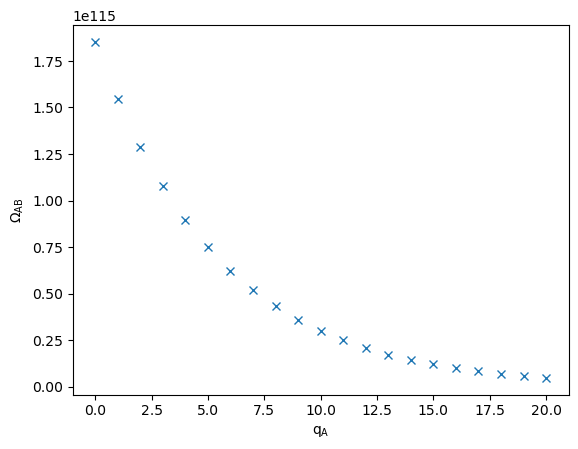

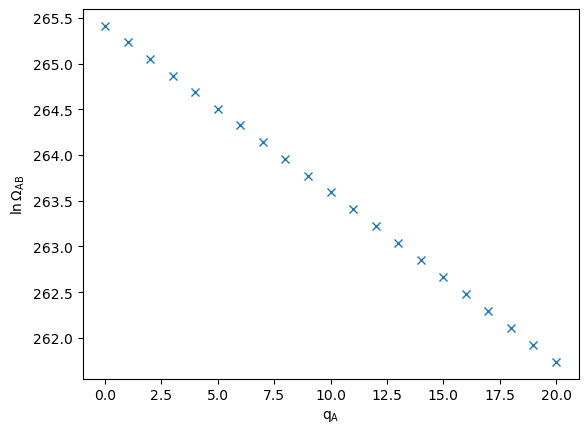

In [5]:
plt.figure()
plt.plot(qs, omega_ABs, "x")
plt.xlabel("$\mathrm{q_A}$")
plt.ylabel("$\mathrm{\Omega_{AB}}$")
plt.savefig("plot1.pdf")
plt.show()


plt.figure()
plt.plot(qs, np.log(omega_ABs), "x")
plt.xlabel("$\mathrm{q_A}$")
plt.ylabel("$\mathrm{\ln{\Omega_{AB}}}$")
plt.savefig("plot2.pdf")
plt.show()

In [6]:
k = 8.617333262e-5 # electron volts per kelvin


    Partition Function Parameters
    T = temperature
    E = energies of the states
    

    Probability "function" parameters
    Z = partition function
    E = energy of the state
    T = temperature
    


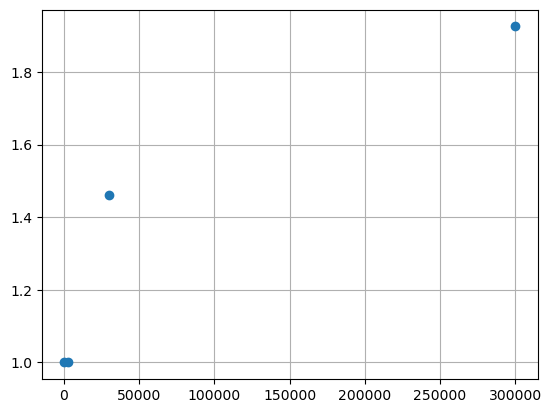

In [7]:
T = np.array([300, 3000, 30000, 300000])
E = np.array([0, 2])

# Partition function
def partition_function(T, E):
    """
    Partition Function Parameters
    T = temperature
    E = energies of the states
    """
    return np.sum(np.exp(-E/(k*T)))

# Probability
def probability(Z, E, T):
    """
    Probability "function" parameters
    Z = partition function
    E = energy of the state
    T = temperature
    """
    return np.exp(-E/(k*T))/Z

# what the probability and partition functions' parameters are
print(partition_function.__doc__)
print(probability.__doc__)

Z = np.array([partition_function(temperature, E) for temperature in T])
# print(T, Z)
plt.plot(T, Z, "o")
plt.grid()
plt.show()

In [8]:
# Probability
E = np.array([-0.05, 0, 0.05]) # in electron volts
Z = partition_function(300, E)
print(Z)
total = 0
for energy in E:
    prob = probability(Z, energy, 300)
    total += prob
    print(prob)
print("Total probability: {}".format(total))

8.062277098494313
0.858035606088943
0.12403443689460351
0.017929957016453505
Total probability: 1.0


In [9]:
E = np.array([0, 0.05, 0.10])
Z = partition_function(300, E)
print(Z)
total = 0
for energy in E:
    prob = probability(Z, energy, 300)
    total += prob
    print(prob)
print("Total probability: {}".format(total))

1.165452800447469
0.858035606088943
0.1240344368946035
0.017929957016453505
Total probability: 1.0


In [10]:
h = 6.62607015e-34 # J/s
k = 1.380649e-23 # J/k
f = 4.8e13 # 1/s
T = 700 # K


for i in range(1, 20, 2):
    print("{}hf/2 ".format(i),end="")
E = np.array([N*h*f/2 for N in range(1, 20, 2)])
print(len(E))
# print(np.exp(-E/(k*T)))


print(partition_function.__doc__)
Z = partition_function(T, E)
print("Partition function: {}".format(Z))
print(probability.__doc__)

P_tot = 0
for energy in E:
    P = probability(Z, energy, T=300)
    P_tot += P
    print("Probability for state {}: {:3f}".format(list(E).index(energy), P))
print(P_tot)

1hf/2 3hf/2 5hf/2 7hf/2 9hf/2 11hf/2 13hf/2 15hf/2 17hf/2 19hf/2 10

    Partition Function Parameters
    T = temperature
    E = energies of the states
    
Partition function: 0.20038306053257768

    Probability "function" parameters
    Z = partition function
    E = energy of the state
    T = temperature
    
Probability for state 0: 0.107328
Probability for state 1: 0.000050
Probability for state 2: 0.000000
Probability for state 3: 0.000000
Probability for state 4: 0.000000
Probability for state 5: 0.000000
Probability for state 6: 0.000000
Probability for state 7: 0.000000
Probability for state 8: 0.000000
Probability for state 9: 0.000000
0.10737720371614945


In [11]:
k = 8.617333262e-5 # electron volts per kelvin
E = -4.7e-4
T = E/(k*np.log(.1)) 
T

2.3686957471475862

In [12]:
E = np.array([0, 0, 0, 0, 1, 1, 1, 4, 4, 6])
T = 300
k = 8.617333262e-5 # electron volts per kelvin

print(partition_function.__doc__)
Z = partition_function(T, E)
print(probability.__doc__)
P = probability(Z, E[5], T)
P


    Partition Function Parameters
    T = temperature
    E = energies of the states
    

    Probability "function" parameters
    Z = partition function
    E = energy of the state
    T = temperature
    


3.968984387916509e-18

In [13]:
def gaussian(x, sigma, mu):
    return (1 / sigma / np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)

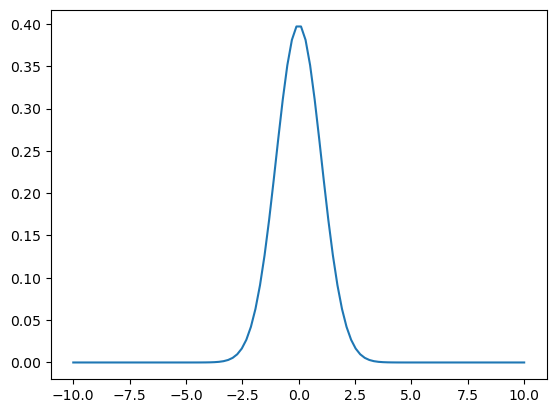

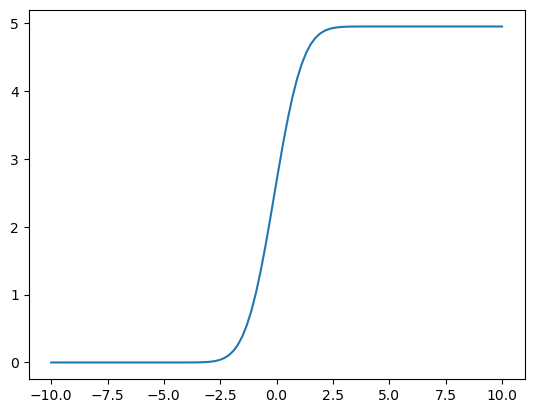

In [26]:
sigma = 1
mu = 0
x = np.linspace(-10, 10, 100)
y = gaussian(x, sigma, mu)

plt.figure()
plt.plot(x, y)

plt.figure()
plt.plot(x, np.cumsum(y))